### 
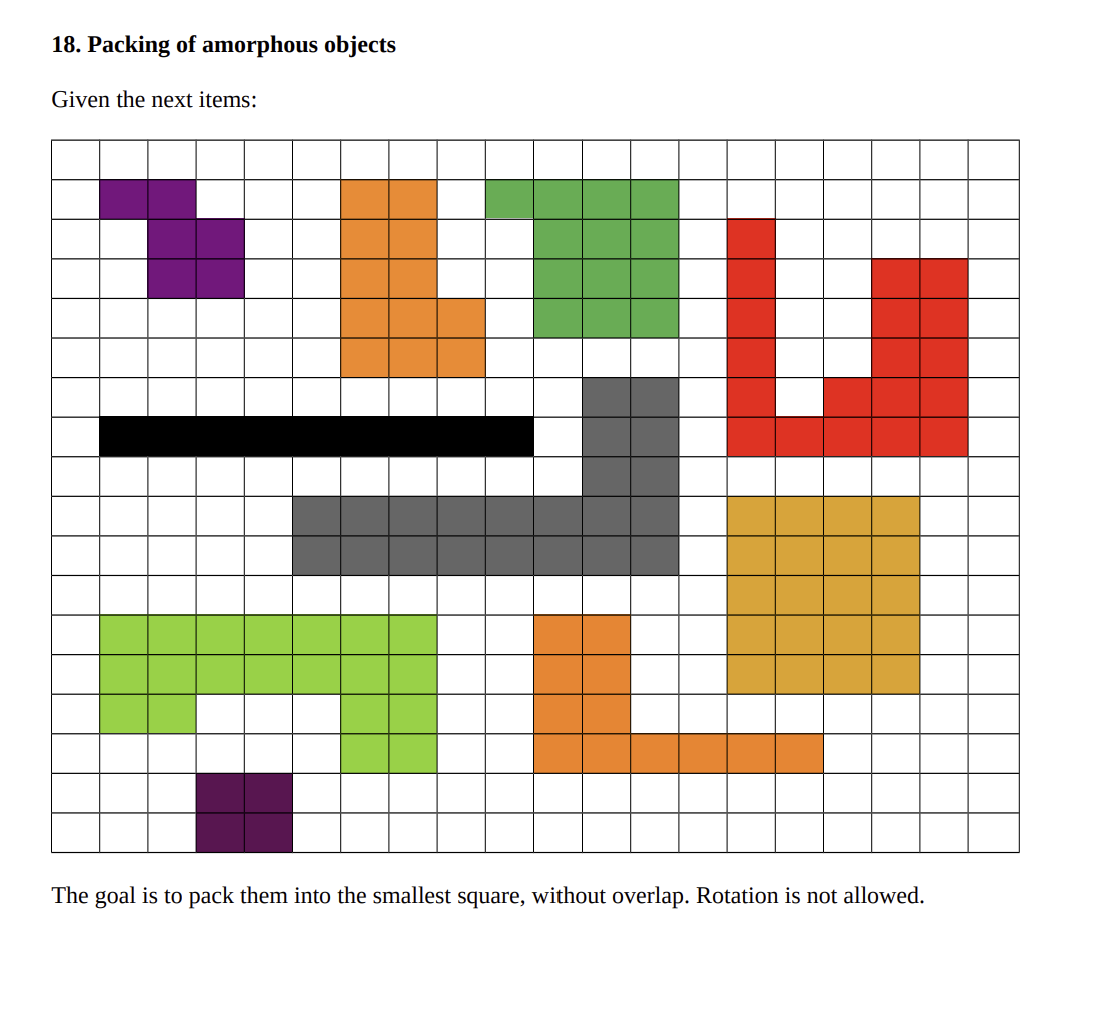

In [1]:
import math
import numpy as np

def extract_shapes(matrix):
    shapes = {}
    for r, row in enumerate(matrix):
        for c, k in enumerate(row):
            if k != 0:
                shapes.setdefault(k, []).append((r, c))
    for k, abs_cells in shapes.items():
        min_r = min(r for r, _ in abs_cells)
        min_c = min(c for _, c in abs_cells)
        rel = [(r - min_r, c - min_c) for r, c in abs_cells]
        max_r = max(r for r, _ in rel)
        max_c = max(c for _, c in rel)
        shapes[k] = {
            'cells': rel,
            'h': max_r + 1,
            'w': max_c + 1,
            'area': len(rel),
        }
    return shapes

def can_place(board, shape, top, left):
    S = board.shape[0]
    for dr, dc in shape['cells']:
        r, c = top + dr, left + dc
        if not (0 <= r < S and 0 <= c < S) or board[r, c] != 0:
            return False
    return True

def place(board, shape, top, left, mark):
    for dr, dc in shape['cells']:
        board[top + dr, left + dc] = mark

def backtrack(board, shapes_list, placements, idx=0):
    if idx == len(shapes_list):
        return True
    k, shape = shapes_list[idx]
    S = board.shape[0]
    for r in range(S - shape['h'] + 1):
        for c in range(S - shape['w'] + 1):
            if can_place(board, shape, r, c):
                place(board, shape, r, c, k)
                placements[k] = (r, c)
                if backtrack(board, shapes_list, placements, idx + 1):
                    return True
                place(board, shape, r, c, 0)
                del placements[k]
    return False

def pack_and_return_board(matrix):
    """
    Packs the given fixed (non-rotatable) polyominoes into the smallest square
    and returns the final board as a NumPy array of shape (S, S).
    """
    shapes = extract_shapes(matrix)
    total_area = sum(v['area'] for v in shapes.values())
    lb = math.ceil(math.sqrt(total_area))
    shapes_list = sorted(shapes.items(), key=lambda x: -x[1]['area'])
    max_side = max(len(matrix), len(matrix[0]))

    for S in range(lb, max_side + 1):
        board = np.zeros((S, S), dtype=int)
        placements = {}
        if backtrack(board, shapes_list, placements):
            # board is now filled with shape IDs at their placed positions
            return board

    raise ValueError("No packing found up to side length {}".format(max_side))




In [ ]:
import time



matrix = [
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,2,2,0,3,3,3,3,0,0,0,0,0,0,0],
    [0,0,1,1,0,0,2,2,0,0,3,3,3,0,4,0,0,0,0,0],
    [0,0,1,1,0,0,2,2,0,0,3,3,3,0,4,0,0,4,4,0],
    [0,0,0,0,0,0,2,2,2,0,3,3,3,0,4,0,0,4,4,0],
    [0,0,0,0,0,0,2,2,2,0,0,0,0,0,4,0,0,4,4,0],
    [0,0,0,0,0,0,0,0,0,0,0,5,5,0,4,0,4,4,4,0],
    [0,6,6,6,6,6,6,6,6,6,0,5,5,0,4,4,4,4,4,0],
    [0,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,0,0],
    [0,0,0,0,0,5,5,5,5,5,5,5,5,0,7,7,7,7,0,0],
    [0,0,0,0,0,5,5,5,5,5,5,5,5,0,7,7,7,7,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,7,0,0],
    [0,9,9,9,9,9,9,9,0,0,8,8,0,0,7,7,7,7,0,0],
    [0,9,9,9,9,9,9,9,0,0,8,8,0,0,7,7,7,7,0,0],
    [0,9,9,0,0,0,9,9,0,0,8,8,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,9,9,0,0,8,8,8,8,8,8,0,0,0,0],
    [0,0,0,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]
print(np.array(matrix).shape)
start = time.time()
final_board = pack_and_return_board(matrix)
end = time.time()
elapsed = end - start
print(f"\n⏱️ Tabu Search completed in {elapsed:.3f} seconds")
print("Packed into a {}×{} board:\n{}".format(*final_board.shape, final_board))

(18, 20)
Packed into a 13×13 board:
[[ 0  0  0  0  0  0  0  0  1  1  0  5  5]
 [ 6  6  6  6  6  6  6  6  6  1  1  5  5]
 [ 7  7  7  7  0  0  0  0  0  1  1  5  5]
 [ 7  7  7  7  0  5  5  5  5  5  5  5  5]
 [ 7  7  7  7  0  5  5  5  5  5  5  5  5]
 [ 7  7  7  7  9  9  9  9  9  9  9 10 10]
 [ 7  7  7  7  9  9  9  9  9  9  9 10 10]
 [ 0  0  2  2  9  9  0  0  4  9  9  0  0]
 [ 0  0  2  2  3  3  3  3  4  9  9  4  4]
 [ 8  8  2  2  0  3  3  3  4  0  0  4  4]
 [ 8  8  2  2  2  3  3  3  4  0  0  4  4]
 [ 8  8  2  2  2  3  3  3  4  0  4  4  4]
 [ 8  8  8  8  8  8  0  0  4  4  4  4  4]]


### SLIGHTLY modifying code, to save snapshots after some K-steps, for visualization purposes

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

def extract_shapes(matrix):
    shapes = {}
    for r, row in enumerate(matrix):
        for c, k in enumerate(row):
            if k != 0:
                shapes.setdefault(k, []).append((r, c))
    for k, abs_cells in shapes.items():
        min_r = min(r for r, _ in abs_cells)
        min_c = min(c for _, c in abs_cells)
        rel = [(r - min_r, c - min_c) for r, c in abs_cells]
        max_r = max(r for r, _ in rel)
        max_c = max(c for _, c in rel)
        shapes[k] = {
            'cells': rel,
            'h': max_r + 1,
            'w': max_c + 1,
            'area': len(rel),
        }
    return shapes

def can_place(board, shape, top, left):
    S = board.shape[0]
    for dr, dc in shape['cells']:
        r, c = top + dr, left + dc
        if not (0 <= r < S and 0 <= c < S) or board[r, c] != 0:
            return False
    return True

def place(board, shape, top, left, mark):
    for dr, dc in shape['cells']:
        board[top + dr, left + dc] = mark

def pack_and_snapshot(matrix, K=2):
    """
    Packs the polyominoes and stores a snapshot of the board every K placements.
    Returns the final board and a list of intermediate board snapshots.
    """
    shapes = extract_shapes(matrix)
    total_area = sum(v['area'] for v in shapes.values())
    lb = math.ceil(math.sqrt(total_area))
    shapes_list = sorted(shapes.items(), key=lambda x: -x[1]['area'])
    max_side = max(len(matrix), len(matrix[0]))

    for S in range(lb, max_side + 1):
        board = np.zeros((S, S), dtype=int)
        snapshots = []
        placement_counter = 0

        def backtrack(idx=0):
            nonlocal placement_counter
            if idx == len(shapes_list):
                return True
            k, shape = shapes_list[idx]
            for r in range(S - shape['h'] + 1):
                for c in range(S - shape['w'] + 1):
                    if can_place(board, shape, r, c):
                        place(board, shape, r, c, k)
                        placement_counter += 1
                        if placement_counter % K == 0:
                            snapshots.append(board.copy())
                        if backtrack(idx + 1):
                            return True
                        place(board, shape, r, c, 0)
                        placement_counter -= 1
            return False

        if backtrack():
            return board, snapshots

    raise RuntimeError("No packing found up to the maximum grid size.")

# ----------------------------
# Example Usage
# ----------------------------



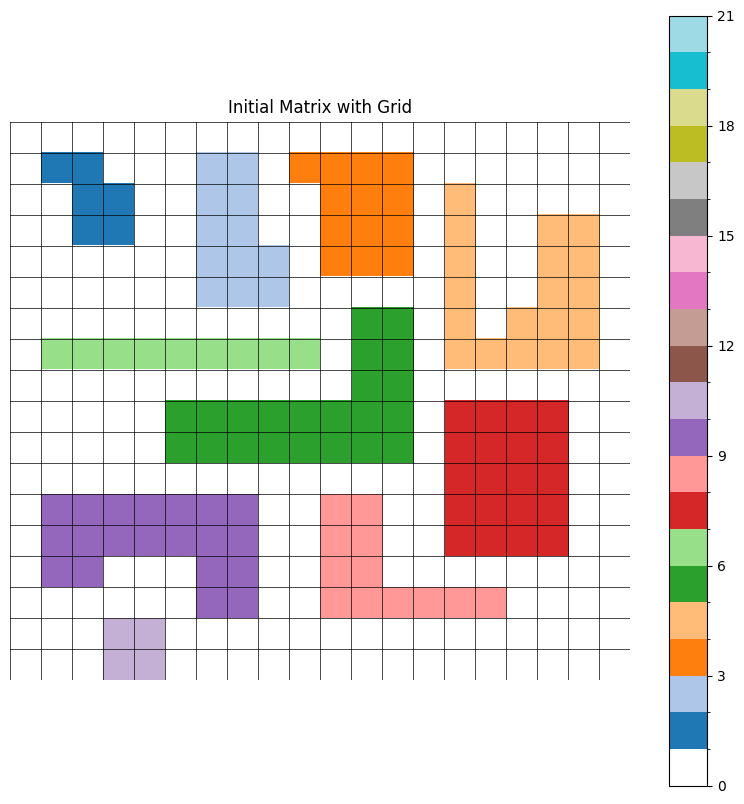

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Original input matrix
matrix = [
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,2,2,0,3,3,3,3,0,0,0,0,0,0,0],
    [0,0,1,1,0,0,2,2,0,0,3,3,3,0,4,0,0,0,0,0],
    [0,0,1,1,0,0,2,2,0,0,3,3,3,0,4,0,0,4,4,0],
    [0,0,0,0,0,0,2,2,2,0,3,3,3,0,4,0,0,4,4,0],
    [0,0,0,0,0,0,2,2,2,0,0,0,0,0,4,0,0,4,4,0],
    [0,0,0,0,0,0,0,0,0,0,0,5,5,0,4,0,4,4,4,0],
    [0,6,6,6,6,6,6,6,6,6,0,5,5,0,4,4,4,4,4,0],
    [0,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,0,0],
    [0,0,0,0,0,5,5,5,5,5,5,5,5,0,7,7,7,7,0,0],
    [0,0,0,0,0,5,5,5,5,5,5,5,5,0,7,7,7,7,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,7,0,0],
    [0,9,9,9,9,9,9,9,0,0,8,8,0,0,7,7,7,7,0,0],
    [0,9,9,9,9,9,9,9,0,0,8,8,0,0,7,7,7,7,0,0],
    [0,9,9,0,0,0,9,9,0,0,8,8,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,9,9,0,0,8,8,8,8,8,8,0,0,0,0],
    [0,0,0,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]

matrix = np.array(matrix)

# Create custom colormap
tab20 = plt.cm.tab20
colors = tab20(np.linspace(0, 1, 20))
colors = np.vstack((np.array([[1, 1, 1, 1]]), colors))  # white for 0
custom_cmap = mcolors.ListedColormap(colors)
bounds = list(range(22))
norm = mcolors.BoundaryNorm(bounds, custom_cmap.N)

# Plot with grid lines
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(matrix, cmap=custom_cmap, norm=norm)

# Draw grid lines
num_rows, num_cols = matrix.shape
for i in range(num_rows + 1):
    ax.axhline(i - 0.5, color='black', linewidth=0.5)
for j in range(num_cols + 1):
    ax.axvline(j - 0.5, color='black', linewidth=0.5)

# Optional text labels in cells (if you want to display values too)
# for i in range(num_rows):
#     for j in range(num_cols):
#         val = matrix[i, j]
#         if val != 0:
#             ax.text(j, i, str(val), ha='center', va='center', fontsize=8)

ax.set_title("Initial Matrix with Grid")
plt.colorbar(cax, ax=ax)
ax.axis('off')
plt.show()


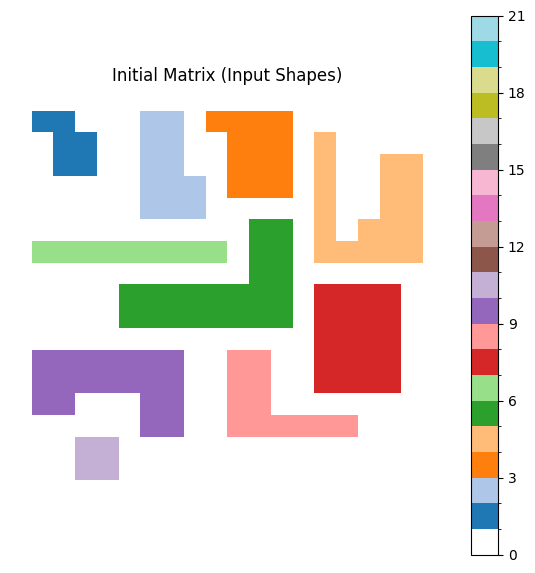

In [9]:
matrix = np.array(matrix)

# Define colormap: white for 0, tab20 for shape IDs
tab20 = plt.cm.tab20
colors = tab20(np.linspace(0, 1, 20))
colors = np.vstack((np.array([[1, 1, 1, 1]]), colors))  # prepend white
custom_cmap = mcolors.ListedColormap(colors)
bounds = list(range(22))
norm = mcolors.BoundaryNorm(bounds, custom_cmap.N)

# Plot
fig, ax = plt.subplots(figsize=(7, 7))
cax = ax.imshow(matrix, cmap=custom_cmap, norm=norm)
ax.set_title("Initial Matrix (Input Shapes)")
plt.colorbar(cax, ax=ax)
ax.axis('off')
plt.show()

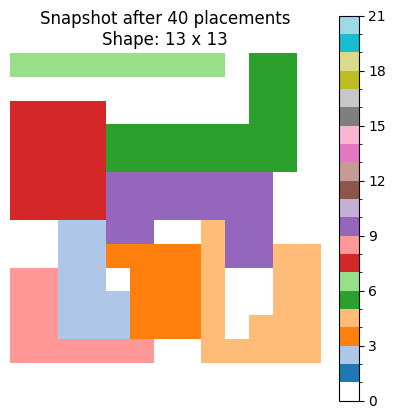

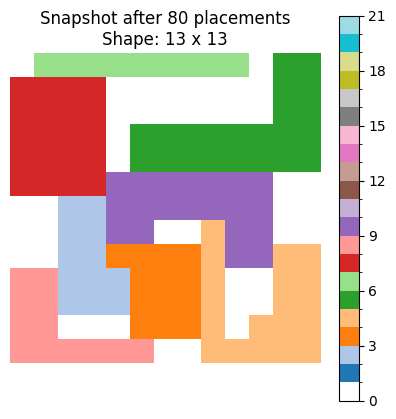

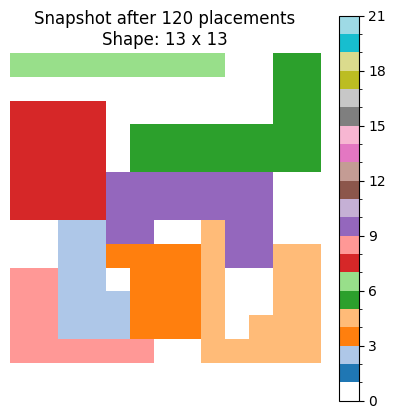

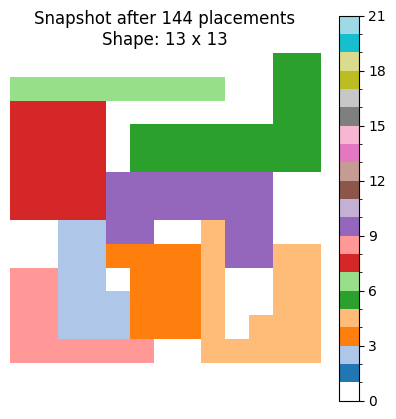

In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

matrix = [
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,2,2,0,3,3,3,3,0,0,0,0,0,0,0],
    [0,0,1,1,0,0,2,2,0,0,3,3,3,0,4,0,0,0,0,0],
    [0,0,1,1,0,0,2,2,0,0,3,3,3,0,4,0,0,4,4,0],
    [0,0,0,0,0,0,2,2,2,0,3,3,3,0,4,0,0,4,4,0],
    [0,0,0,0,0,0,2,2,2,0,0,0,0,0,4,0,0,4,4,0],
    [0,0,0,0,0,0,0,0,0,0,0,5,5,0,4,0,4,4,4,0],
    [0,6,6,6,6,6,6,6,6,6,0,5,5,0,4,4,4,4,4,0],
    [0,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,0,0],
    [0,0,0,0,0,5,5,5,5,5,5,5,5,0,7,7,7,7,0,0],
    [0,0,0,0,0,5,5,5,5,5,5,5,5,0,7,7,7,7,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,7,0,0],
    [0,9,9,9,9,9,9,9,0,0,8,8,0,0,7,7,7,7,0,0],
    [0,9,9,9,9,9,9,9,0,0,8,8,0,0,7,7,7,7,0,0],
    [0,9,9,0,0,0,9,9,0,0,8,8,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,9,9,0,0,8,8,8,8,8,8,0,0,0,0],
    [0,0,0,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
]

tab20 = plt.cm.tab20
colors = tab20(np.linspace(0, 1, 20))
colors = np.vstack((np.array([[1, 1, 1, 1]]), colors))  # white for 0
custom_cmap = mcolors.ListedColormap(colors)
bounds = list(range(22))  # covers shape IDs 0–21
norm = mcolors.BoundaryNorm(bounds, custom_cmap.N)

# 2. Control how many snapshots to show
display_every = 5  # change this to 2, 10, etc. if needed

# 3. Plot every N-th snapshot and the final one
for idx, snap in enumerate(snapshots, start=1):
    if idx % display_every != 0 and idx != len(snapshots):
        continue  # skip unless it's every Nth or the last snapshot
    fig, ax = plt.subplots(figsize=(5, 5))
    cax = ax.imshow(snap, cmap=custom_cmap, norm=norm)
    shape_str = f"Shape: {snap.shape[0]} x {snap.shape[1]}"
    ax.set_title(f"Snapshot after {idx * K} placements\n{shape_str}")
    plt.colorbar(cax, ax=ax)
    ax.axis('off')
    plt.show()
    plt.close(fig)